# Downloading public data

Something you may want to do in the future is compare your results to papers that came before you. Today we'll go through how to find these data and how to analyze them

## Reading list

- [What the FPKM: A review of RNA-Seq expression units](https://haroldpimentel.wordpress.com/2014/05/08/what-the-fpkm-a-review-rna-seq-expression-units/) - Explain difference between TPM/FPKM/RPKM units
- [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) - linear correlation unit
- [Single-cell transcriptomics reveals bimodality in expression and splicing in immune cells](http://www.ncbi.nlm.nih.gov/pubmed/23685454) (Shalek and Satija, *et al*. *Nature* (2013))


## 1. Find the database and accession codes

At the end of most recent papers, they'll put a section called "**Accession Codes**" or "**Accession Numbers**" which will list a uniquely identifying number and letter combination.

In the US, the Gene Expression Omnibus (GEO) is a website funded by the NIH to store the expression data associated with papers. Many journals require you to submit your data to GEO to be able to publish.

### Example data accession section from a Cell paper

![Accession numbers in Cell journal](figures/accession_numbers_cell.png)

### Example data accession section from a Nature Biotech paper
![Accession codes in Nature Biotech journal](figures/accession_codes_buettner.png)

Let's do this for the Shalek2013 paper. 

*Note: For some "older" papers (pre 2014), the accession code may not be on the PDF version of the paper but on the online version only. What I usually do then is search for the title of the paper and go to the journal website.*

For your homework, you'll need to find another dataset to use and the expression matrix that you want may not be on a database, but rather posted in supplementary data on the journal's website.

* What database was the data deposited to? 
* What is its' accession number?

## 2. Go to the data in the database

If you search for the database and the accession number, the first result will usually be the database with the paper info and the deposited data! Below is an example search for "Array Express E-MTAB-2805."

![Example search for "Array Express E-MTAB-2805"](figures/buettner_search_accession.png)

Search for its database and accession number and you should get to a page that looks like this:

![GEO overview page for Shalek 2013](figures/shalek2013_geo.png)

## 3. Find the gene expression matrix

Lately, for many papers, they *do* give a processed expression matrix in the accession database that you can use directly. Luckily for us, that's exactly what the authors of the Shalek 2013 dataset did. If you notice at the bottom of the page, there's a table of Supplementary files and one of them is called "`GSE41265_allGenesTPM.txt.gz`". The link below is the "(ftp)" link copied down with the command "`wget`" which I think of as short for "web-get" so you can download files from the internet with the command line.

In addition to the gene expression file, we'll also look at the metadata in the "Series Matrix" file. 

1. **Download the "Series Matrix" to your laptop** and 
2. **Download the `GSE41265_allGenesTPM.txt.gz`" file**. 

All the "Series" file formats contain the same information in different formats. I find the matrix one is the easiest to understand.

Open the "Series Matrix" in Excel (or equivalent) on your laptop, and look at the format and what's described. What line does the actual matrix of metadata start? You can find it where it says in the first column ,"!!Sample_title." It's after an empty line.

# Get the data easy here:

Follow this [link](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE41265) to jump directly to the GEO page for this data. Scroll down to the bottom in supplemental material. And download the link for the table called GSE41265_allGenesTPM.txt.gz.

We also need the link to the metadata. It is [here](ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41265/matrix/). Download the file called GSE41265_series_matrix.txt.gz. 

Where did those files go on your computer? Maybe you moved it somewhere. Figure out what the full path of those files are and we will read that in directly below. 

## 4. Reading in the data file

To read the gene expression matrix, we'll use "`pandas`" a Python package for "Panel Data Analysis" (as in panels of data), which is a fantastic library for working with dataframes, and is Python's answer to R's dataframes. We'll take this opportunity to import ALL of the python libaries that we'll use today.

We'll be using several additional libraries in Python:

3. [`matplotlib`](http://matplotlib.org/) - This is the base plotting library in Python.
1. [`numpy`](http://www.numpy.org/) - (pronounced "num-pie") which is basis for most scientific packages. It's basically a nice-looking Python interface to C code. It's very fast.
2. [`pandas`](http://pandas.pydata.org) - This is the "DataFrames in Python." (like R's nice dataframes) They're a super convenient form that's based on `numpy` so they're fast. And you can do convenient things like calculate mea n and variance very easily.
4. [`scipy`](http://www.scipy.org/) - (pronounced "sigh-pie") "Scientific Python" - Contains statistical methods and calculations
4. [`seaborn`](http://web.stanford.edu/~mwaskom/software/seaborn/index.html) - Statistical plotting library. To be completely honest, R's plotting and graphics capabilities are much better than Python's. However, Python is a really nice langauge to learn and use, it's very memory efficient, can be parallized well, and has a very robust machine learning library, `scikit-learn`, which has a very nice and consistent interface. So this is Python's answer to `ggplot2` (very popular R library for plotting) to try and make plotting in Python nicer looking and to make statistical plots easier to do.


In [7]:
# Alphabetical order is standard
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Python plotting library
import matplotlib.pyplot as plt

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# Statistical plotting library we'll use
import seaborn as sns

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline



We'll read in the data using `pandas` and look at the first 5 rows of the dataframe with the dataframe-specific function `.head()`. Whenever I read a new table or modify a dataframe, I **ALWAYS** look at it to make sure it was correctly imported and read in, and I want you to get into the same habit.

In [8]:
# Read the data table
# You may need to change the path to the file (what's in quotes below) relative 
# to where you downloaded the file and where this notebook is
shalek2013_expression = pd.read_table('/home/ecwheele/cshl2017/GSE41265_allGenesTPM.txt.gz', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0, 

                                     # Tells pandas to decompress the gzipped file
                                      compression='gzip')



shalek2013_expression.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,0.024137,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,0.000000,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,0.000000,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605


That's kind of annoying ... we don't see all the samples.

So we have 21 columns but looks like here `pandas` by default is showing a maximum of 20 so let's change the setting so we can see ALL of the samples instead of just skipping single cell 11 (**S11**). Let's change to 50 for good measure.

In [9]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
shalek2013_expression.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,0.024137,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,0.000000,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,0.000000,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605


Now we can see all the samples!

Let's take a look at the full size of the matrix with `.shape`:

In [10]:
shalek2013_expression.shape

(27723, 21)

Wow, ~28k rows! That must be the genes, while there are 18 single cell samples and 3 pooled samples as the columns. We'll do some filtering in the next few steps.

## 5. Reading in the metadata



In [12]:
shalek2013_metadata = pd.read_table('/home/ecwheele/cshl2017/GSE41265_series_matrix.txt.gz',
                                    compression = 'gzip',
                                    skiprows=33, 
                                    index_col=0)
shalek2013_metadata

,Single cell S1,Single cell S2,Single cell S3,Single cell S4,Single cell S5,Single cell S6,Single cell S7,Single cell S8,Single cell S9,Single cell S10,Single cell S11,Single cell S12,Single cell S13,Single cell S14,Single cell S15,Single cell S16,Single cell S17,Single cell S18,"10,000 cell population P1","10,000 cell population P2","10,000 cell population P3",Molecular barcode single cell MB1,Molecular barcode single cell MB2,Molecular barcode single cell MB3
!Sample_title,,,,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM1012777,GSM1012778,GSM1012779,GSM1012780,GSM1012781,GSM1012782,GSM1012783,GSM1012784,GSM1012785,GSM1012786,GSM1012787,GSM1012788,GSM1012789,GSM1012790,GSM1012791,GSM1012792,GSM1012793,GSM1012794,GSM1012795,GSM1012796,GSM1012797,GSM1110889,GSM1110890,GSM1110891
!Sample_status,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013,Public on May 19 2013
!Sample_submission_date,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Oct 01 2012,Mar 29 2013,Mar 29 2013,Mar 29 2013
!Sample_last_update_date,May 19 2013,May 19 2013,May 19 2013,May 19 2013,May 19 2013,May 19 2013,May 19 2013,May 19 2013,May 19 2013,May 19 2013,May 19 2013,Dec 23 2013,Dec 23 2013,Dec 23 2013,Dec 23 2013,Dec 23 2013,Dec 23 2013,Dec 23 2013,May 19 2013,May 19 2013,May 19 2013,May 21 2013,May 21 2013,May 21 2013
!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
!Sample_channel_count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
!Sample_source_name_ch1,BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim),BMDC (4h LPS stim)
!Sample_organism_ch1,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus,Mus musculus
!Sample_characteristics_ch1,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6,strain: C57BL/6


Let's transpose this matrix so the samples are the rows, and the features are the columns. We'll do that with `.T`

In [13]:
shalek2013_metadata = shalek2013_metadata.T
shalek2013_metadata

!Sample_title,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_growth_protocol_ch1,!Sample_molecule_ch1,!Sample_extract_protocol_ch1,!Sample_extract_protocol_ch1,!Sample_extract_protocol_ch1,!Sample_extract_protocol_ch1,!Sample_extract_protocol_ch1,!Sample_extract_protocol_ch1,!Sample_taxid_ch1,!Sample_description,!Sample_data_processing,!Sample_data_processing,!Sample_data_processing,!Sample_data_processing,!Sample_platform_id,!Sample_contact_name,!Sample_contact_email,!Sample_contact_phone,!Sample_contact_laboratory,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_state,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_data_row_count,!Sample_instrument_model,!Sample_library_selection,!Sample_library_source,!Sample_library_strategy,!Sample_relation,!Sample_relation,!Sample_supplementary_file_1,!series_matrix_table_begin,ID_REF,!series_matrix_table_end
Single cell S1,GSM1012777,Public on May 19 2013,Oct 01 2012,May 19 2013,SRA,1,BMDC (4h LPS stim),Mus musculus,strain: C57BL/6,cell type: Bone Marrow-derived Dendritic Cell ...,treatment: LPS-stimulation,cell count: 1 cell,NaN,Cells were cultured and stimulated with LPS as...,polyA RNA,cDNA synthesis and amplification:,We used the SMARTer Ultra Low RNA Kit (Clontec...,We created Illumina sequencing libraries from ...,cDNA shearing and library construction:,We added the purification buffer (Clontech) to...,We prepared indexed paired-end libraries for I...,10090,S1,We created a Bowtie index based on the UCSC kn...,"Next, we ran RSEM v1.11 with default parameter...",Genome_build: mm9,Supplementary_files_format_and_content: File a...,GPL13112,"Rahul,,Satija",rsatija@nygenome.org,6177022468,Satija Lab,New York Genome Center,101 Avenue of the Americas,New York City,NY,10013,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-insta...,NaN,GSM1012777,NaN
Single cell S2,GSM1012778,Public on May 19 2013,Oct 01 2012,May 19 2013,SRA,1,BMDC (4h LPS stim),Mus musculus,strain: C57BL/6,cell type: Bone Marrow-derived Dendritic Cell ...,treatment: LPS-stimulation,cell count: 1 cell,NaN,Cells were cultured and stimulated with LPS as...,polyA RNA,cDNA synthesis and amplification:,We used the SMARTer Ultra Low RNA Kit (Clontec...,We created Illumina sequencing libraries from ...,cDNA shearing and library construction:,We added the purification buffer (Clontech) to...,We prepared indexed paired-end libraries for I...,10090,S2,We created a Bowtie index based on the UCSC kn...,"Next, we ran RSEM v1.11 with default parameter...",Genome_build: mm9,Supplementary_files_format_and_content: File a...,GPL13112,"Rahul,,Satija",rsatija@nygenome.org,6177022468,Satija Lab,New York Genome Center,101 Avenue of the Americas,New York City,NY,10013,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-insta...,NaN,GSM1012778,NaN
Single cell S3,GSM1012779,Public on May 19 2013,Oct 01 2012,May 19 2013,SRA,1,BMDC (4h LPS stim),Mus musculus,strain: C57BL/6,cell type: Bone Marrow-derived Dendritic Cell ...,treatment: LPS-stimulation,cell count: 1 cell,NaN,Cells were cultured and stimulated with LPS as...,polyA RNA,cDNA synthesis and amplification:,We used the SMARTer Ultra Low RNA Kit (Clontec...,We created Illumina sequencing libraries from ...,cDNA shearing and library construction:,We added the purification buffer (Clontech) to...,We prepared indexed paired-end libraries for I...,10090,S3,We created a Bowtie index based on the UCSC

Now we'll do some mild data cleaning. Notice that the columns have the exclamation point at the beginning, so let's get rid of that. In computer science, you keep letters between quotes, and you call those "strings." Let's talk about the string function `.strip()`. This removes any characters that are on the outer edges of the string. For example, let's take the string "Whoooo!!!!!!!"

In [14]:
"Whoooo!!!!!!!"

'Whoooo!!!!!!!'

Now let's remove the exclamation points:

In [15]:
'Whoooo!!!!!!!'.strip('!')

'Whoooo'

### Exercise 1: Stripping strings

What happens if you try to remove the `'o'`s?

In [16]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [17]:
'Whoooo!!!!!!!'.strip('o')

'Whoooo!!!!!!!'

In [18]:
'Whoooo!!!!!!!'.replace("o","")

'Wh!!!!!!!'

We can access the column names with `dataframe.columns`, like below:

In [19]:
shalek2013_metadata.columns

Index(['!Sample_geo_accession', '!Sample_status', '!Sample_submission_date',
       '!Sample_last_update_date', '!Sample_type', '!Sample_channel_count',
       '!Sample_source_name_ch1', '!Sample_organism_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_characteristics_ch1',
       '!Sample_characteristics_ch1', '!Sample_growth_protocol_ch1',
       '!Sample_molecule_ch1', '!Sample_extract_protocol_ch1',
       '!Sample_extract_protocol_ch1', '!Sample_extract_protocol_ch1',
       '!Sample_extract_protocol_ch1', '!Sample_extract_protocol_ch1',
       '!Sample_extract_protocol_ch1', '!Sample_taxid_ch1',
       '!Sample_description', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_data_processing',
       '!Sample_data_processing', '!Sample_platform_id',
       '!Sample_contact_name', '!Sample_contact_email',
       '!Sample_contact_phone', '!Sample_contact_laboratory',
       '!Sample_contact_

We can map the stripping function to every item of the columns. In Python, the square brackets (`[` and `]`) show that we're making a list. What we're doing below is called a "list comprehension."

In [20]:
[x.strip('!') for x in shalek2013_metadata.columns]

['Sample_geo_accession',
 'Sample_status',
 'Sample_submission_date',
 'Sample_last_update_date',
 'Sample_type',
 'Sample_channel_count',
 'Sample_source_name_ch1',
 'Sample_organism_ch1',
 'Sample_characteristics_ch1',
 'Sample_characteristics_ch1',
 'Sample_characteristics_ch1',
 'Sample_characteristics_ch1',
 'Sample_characteristics_ch1',
 'Sample_growth_protocol_ch1',
 'Sample_molecule_ch1',
 'Sample_extract_protocol_ch1',
 'Sample_extract_protocol_ch1',
 'Sample_extract_protocol_ch1',
 'Sample_extract_protocol_ch1',
 'Sample_extract_protocol_ch1',
 'Sample_extract_protocol_ch1',
 'Sample_taxid_ch1',
 'Sample_description',
 'Sample_data_processing',
 'Sample_data_processing',
 'Sample_data_processing',
 'Sample_data_processing',
 'Sample_platform_id',
 'Sample_contact_name',
 'Sample_contact_email',
 'Sample_contact_phone',
 'Sample_contact_laboratory',
 'Sample_contact_institute',
 'Sample_contact_address',
 'Sample_contact_city',
 'Sample_contact_state',
 'Sample_contact_zip/pos

In `pandas`, we can do the same thing by `map`-ping a `lambda`, which is a small, anonymous function that does one thing. It's called "anonymous" because it doesn't have a name. `map` runs the function on every element of the columns.

In [21]:
shalek2013_metadata.columns.map(lambda x: x.strip('!'))

Index(['Sample_geo_accession', 'Sample_status', 'Sample_submission_date',
       'Sample_last_update_date', 'Sample_type', 'Sample_channel_count',
       'Sample_source_name_ch1', 'Sample_organism_ch1',
       'Sample_characteristics_ch1', 'Sample_characteristics_ch1',
       'Sample_characteristics_ch1', 'Sample_characteristics_ch1',
       'Sample_characteristics_ch1', 'Sample_growth_protocol_ch1',
       'Sample_molecule_ch1', 'Sample_extract_protocol_ch1',
       'Sample_extract_protocol_ch1', 'Sample_extract_protocol_ch1',
       'Sample_extract_protocol_ch1', 'Sample_extract_protocol_ch1',
       'Sample_extract_protocol_ch1', 'Sample_taxid_ch1', 'Sample_description',
       'Sample_data_processing', 'Sample_data_processing',
       'Sample_data_processing', 'Sample_data_processing',
       'Sample_platform_id', 'Sample_contact_name', 'Sample_contact_email',
       'Sample_contact_phone', 'Sample_contact_laboratory',
       'Sample_contact_institute', 'Sample_contact_address',
  

The above `lambda` is the same as if we had written a *named* function called `remove_exclamation`, as below.

In [22]:
def remove_exclamation(x):
    return x.strip('!')

shalek2013_metadata.columns.map(remove_exclamation)

Index(['Sample_geo_accession', 'Sample_status', 'Sample_submission_date',
       'Sample_last_update_date', 'Sample_type', 'Sample_channel_count',
       'Sample_source_name_ch1', 'Sample_organism_ch1',
       'Sample_characteristics_ch1', 'Sample_characteristics_ch1',
       'Sample_characteristics_ch1', 'Sample_characteristics_ch1',
       'Sample_characteristics_ch1', 'Sample_growth_protocol_ch1',
       'Sample_molecule_ch1', 'Sample_extract_protocol_ch1',
       'Sample_extract_protocol_ch1', 'Sample_extract_protocol_ch1',
       'Sample_extract_protocol_ch1', 'Sample_extract_protocol_ch1',
       'Sample_extract_protocol_ch1', 'Sample_taxid_ch1', 'Sample_description',
       'Sample_data_processing', 'Sample_data_processing',
       'Sample_data_processing', 'Sample_data_processing',
       'Sample_platform_id', 'Sample_contact_name', 'Sample_contact_email',
       'Sample_contact_phone', 'Sample_contact_laboratory',
       'Sample_contact_institute', 'Sample_contact_address',
  

Now we can assign the new column names to our matrix:

In [23]:
shalek2013_metadata.columns = shalek2013_metadata.columns.map(lambda x: x.strip('!'))
shalek2013_metadata.head()

!Sample_title,Sample_geo_accession,Sample_status,Sample_submission_date,Sample_last_update_date,Sample_type,Sample_channel_count,Sample_source_name_ch1,Sample_organism_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1,Sample_characteristics_ch1,Sample_growth_protocol_ch1,Sample_molecule_ch1,Sample_extract_protocol_ch1,Sample_extract_protocol_ch1,Sample_extract_protocol_ch1,Sample_extract_protocol_ch1,Sample_extract_protocol_ch1,Sample_extract_protocol_ch1,Sample_taxid_ch1,Sample_description,Sample_data_processing,Sample_data_processing,Sample_data_processing,Sample_data_processing,Sample_platform_id,Sample_contact_name,Sample_contact_email,Sample_contact_phone,Sample_contact_laboratory,Sample_contact_institute,Sample_contact_address,Sample_contact_city,Sample_contact_state,Sample_contact_zip/postal_code,Sample_contact_country,Sample_data_row_count,Sample_instrument_model,Sample_library_selection,Sample_library_source,Sample_library_strategy,Sample_relation,Sample_relation,Sample_supplementary_file_1,series_matrix_table_begin,ID_REF,series_matrix_table_end
Single cell S1,GSM1012777,Public on May 19 2013,Oct 01 2012,May 19 2013,SRA,1,BMDC (4h LPS stim),Mus musculus,strain: C57BL/6,cell type: Bone Marrow-derived Dendritic Cell ...,treatment: LPS-stimulation,cell count: 1 cell,NaN,Cells were cultured and stimulated with LPS as...,polyA RNA,cDNA synthesis and amplification:,We used the SMARTer Ultra Low RNA Kit (Clontec...,We created Illumina sequencing libraries from ...,cDNA shearing and library construction:,We added the purification buffer (Clontech) to...,We prepared indexed paired-end libraries for I...,10090,S1,We created a Bowtie index based on the UCSC kn...,"Next, we ran RSEM v1.11 with default parameter...",Genome_build: mm9,Supplementary_files_format_and_content: File a...,GPL13112,"Rahul,,Satija",rsatija@nygenome.org,6177022468,Satija Lab,New York Genome Center,101 Avenue of the Americas,New York City,NY,10013,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-insta...,NaN,GSM1012777,NaN
Single cell S2,GSM1012778,Public on May 19 2013,Oct 01 2012,May 19 2013,SRA,1,BMDC (4h LPS stim),Mus musculus,strain: C57BL/6,cell type: Bone Marrow-derived Dendritic Cell ...,treatment: LPS-stimulation,cell count: 1 cell,NaN,Cells were cultured and stimulated with LPS as...,polyA RNA,cDNA synthesis and amplification:,We used the SMARTer Ultra Low RNA Kit (Clontec...,We created Illumina sequencing libraries from ...,cDNA shearing and library construction:,We added the purification buffer (Clontech) to...,We prepared indexed paired-end libraries for I...,10090,S2,We created a Bowtie index based on the UCSC kn...,"Next, we ran RSEM v1.11 with default parameter...",Genome_build: mm9,Supplementary_files_format_and_content: File a...,GPL13112,"Rahul,,Satija",rsatija@nygenome.org,6177022468,Satija Lab,New York Genome Center,101 Avenue of the Americas,New York City,NY,10013,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-insta...,NaN,GSM1012778,NaN
Single cell S3,GSM1012779,Public on May 19 2013,Oct 01 2012,May 19 2013,SRA,1,BMDC (4h LPS stim),Mus musculus,strain: C57BL/6,cell type: Bone Marrow-derived Dendritic Cell ...,treatment: LPS-stimulation,cell count: 1 cell,NaN,Cells were cultured and stimulated with LPS as...,polyA RNA,cDNA synthesis and amplification:,We used the SMARTer Ultra Low RNA Kit (Clontec...,We created Illumina sequencing libraries from ...,cDNA shearing and library construction:,We added the purification buffer (Clontech) to...,We prepared indexed paired-end libraries for I...,10090,S3,We created a Bowtie index based on the UCSC kn...,"Next, we ran RSEM v1.11 with default par

### Okay, now we're ready to do some analysis! 

We've looked at the top of the dataframe by using `head()`. By default, this shows the first 5 rows.

In [24]:
shalek2013_expression.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,0.024137,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,0.000000,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,0.000000,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605


To specify a certain number of rows, put a number between the parentheses.

In [25]:
shalek2013_expression.head(8)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,0.024137,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,0.000000,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,0.000000,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605
T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDE10A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018610,0.011152
1700010I14RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806956,0.000000,0.000000


### Exercise 2: using `.head()`

Show the first 17 rows of `shalek2013_expression`

In [ ]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [26]:
shalek2013_expression.head(17)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019906,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.023441,0.000000,0.000000,0.029378,0.000000,0.055452,0.000000,0.029448,0.024137,0.000000,0.000000,0.031654,0.000000,0.000000,0.000000,42.150208,0.680327,0.022996,0.110236
NPL,72.008590,0.000000,128.062012,0.095082,0.000000,0.000000,112.310234,104.329122,0.119230,0.000000,0.000000,0.000000,0.116802,0.104200,0.106188,0.229197,0.110582,0.000000,7.109356,6.727028,14.525447
T2,0.109249,0.172009,0.000000,0.000000,0.182703,0.076012,0.078698,0.000000,0.093698,0.076583,0.000000,0.693459,0.010137,0.081936,0.000000,0.000000,0.086879,0.068174,0.062063,0.000000,0.050605
T,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDE10A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018610,0.011152
1700010I14RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806956,0.000000,0.000000
6530411M01RIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's get a sense of this data by plotting the distributions using `boxplot` from seaborn. To save the output, we'll need to get access to the current figure, and save this to a variable using `plt.gcf()`. And then we'll save this figure with `fig.savefig("filename.pdf")`. You can use other extensions (e.g. "`.png`", "`.tiff`" and it'll automatically save as that forma)

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


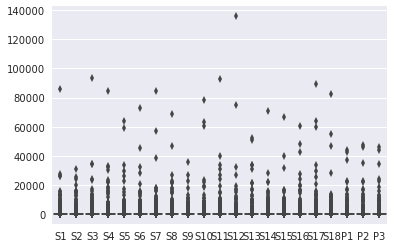

In [27]:
sns.boxplot(shalek2013_expression)

# gcf = Get current figure
fig = plt.gcf()
fig.savefig('shalek2013_expression_boxplot.pdf')

Notice the 140,000 maximum ... Oh right we have expression data and the scales are enormous... Let's add 1 to all values and take the log2 of the data. We add one because log(0) is undefined and then all our logged values start from zero too. This "$\log_2(TPM + 1)$" is a very common transformation of expression data so it's easier to analyze.

In [28]:
expression_logged = np.log2(shalek2013_expression+1)
expression_logged.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.033427,0.000000,0.000000,0.041774,0.000000,0.077861,0.000000,0.041871,0.034409,0.000000,0.000000,0.044960,0.000000,0.000000,0.000000,5.431296,0.748742,0.032801,0.150866
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,0.000000,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
T2,0.149583,0.228984,0.000000,0.000000,0.242088,0.105695,0.109290,0.000000,0.129215,0.106459,0.000000,0.759973,0.014551,0.113616,0.000000,0.000000,0.120192,0.095146,0.086869,0.000000,0.071221


/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


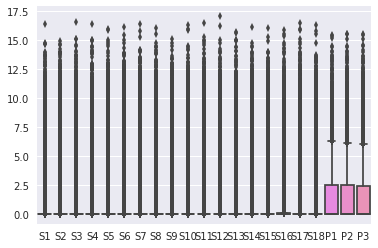

In [29]:
sns.boxplot(expression_logged)

# gcf = Get current figure
fig = plt.gcf()
fig.savefig('expression_logged_boxplot.pdf')

### Exercise 3: Interpreting distributions
Now that these are on moreso on the same scale ...

Q: What do you notice about the pooled samples (P1, P2, P3) that is different from the single cells?

YOUR ANSWER HERE

## Filtering expression data

Seems like a lot of genes are near zero, which means we need to filter our genes.

We can ask which genes have log2 expression values are less than 2 (weird example I know - stay with me). This creates a dataframe of `boolean` values of True/False.

In [40]:
expression_logged < 2

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
AB338584,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
B3GAT2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
NPL,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,False,False,False
T2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
T,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
PDE10A,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1700010I14RIK,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6530411M01RIK,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


What's nice about booleans is that False is 0 and True is 1, so we can sum to get the number of "Trues." This is a simple, clever way that we can filter on a count for the data. We **could** use this boolean dataframe to filter our original dataframe, but then we lose information. For all values that are greater than 2, it puts in a "not a number" - "NaN."

In [41]:
expression_at_most_2 = expression_logged[expression_logged < 2]
print(expression_at_most_2.shape)
expression_at_most_2.head()

(27723, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.033427,0.000000,0.000000,0.041774,0.00000,0.077861,0.000000,0.041871,0.034409,0.000000,0.000000,0.044960,0.000000,0.000000,0.000000,NaN,0.748742,0.032801,0.150866
NPL,NaN,0.000000,NaN,0.131039,0.000000,0.000000,NaN,NaN,0.162507,0.000000,0.000000,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,NaN,NaN,NaN
T2,0.149583,0.228984,0.000000,0.000000,0.242088,0.105695,0.10929,0.000000,0.129215,0.106459,0.000000,0.759973,0.014551,0.113616,0.000000,0.000000,0.120192,0.095146,0.086869,0.000000,0.071221


### Exercise 4: Crude filtering on expression data

Create a dataframe called "`expression_greater_than_5`" which contains only values that are greater than 5 from `expression_logged`.

In [ ]:
# YOUR CODE HERE

![](figures/dont_scroll.svg)

In [36]:
expression_logged.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.033427,0.000000,0.000000,0.041774,0.000000,0.077861,0.000000,0.041871,0.034409,0.000000,0.000000,0.044960,0.000000,0.000000,0.000000,5.431296,0.748742,0.032801,0.150866
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,0.000000,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
T2,0.149583,0.228984,0.000000,0.000000,0.242088,0.105695,0.109290,0.000000,0.129215,0.106459,0.000000,0.759973,0.014551,0.113616,0.000000,0.000000,0.120192,0.095146,0.086869,0.000000,0.071221


In [42]:
expression_greater_than_5 = expression_logged[expression_logged > 5]
expression_greater_than_5.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
XKR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AB338584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B3GAT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.431296,NaN,NaN,NaN
NPL,6.189994,NaN,7.011921,NaN,NaN,NaN,6.824134,6.718761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



The crude filtering above is okay, but we're smarter than that. We want to use the filtering in the paper: 

> *... discarded genes that were not appreciably expressed (transcripts per million (TPM) > 1) in at least three individual cells, retaining 6,313 genes for further analysis.*

We want to do THAT, but first we need a couple more concepts. The first one is summing booleans.

## A smarter way to filter

Remember that booleans are really 0s (`False`) and 1s (`True`)? This turns out to be VERY convenient and we can use this concept in clever ways.

We can use `.sum()` on a boolean matrix to get the number of genes with expression greater than 10 for each sample:

In [43]:
(expression_logged > 10).sum()

S1     136
S2     174
S3     142
S4     135
S5     134
S6     144
S7     145
S8     124
S9     171
S10    135
S11    132
S12    129
S13    133
S14    139
S15    157
S16    147
S17    119
S18    152
P1     136
P2     136
P3     140
dtype: int64

`pandas` is column-oriented and by default, it will give you a sum for each column. But **we** want a sum for each row. How do we do that?


We can sum the boolean matrix we created with "`expression_logged < 10`" along `axis=1` (along the samples) to get **for each gene, how many samples have expression less than 10**. In `pandas`, this column is called a "`Series`" because it has only one dimension - its length. Internally, `pandas` stores dataframes as a bunch of columns - specifically these `Series`ssssss.

This turns out to be not that many.

In [44]:
(expression_logged > 10).sum(axis=1)

GENE
XKR4             0
AB338584         0
B3GAT2           0
NPL              0
T2               0
T                0
PDE10A           0
1700010I14RIK    0
6530411M01RIK    0
PABPC6           0
AK019626         0
AK020722         0
QK               0
B930003M22RIK    0
RGS8             0
PACRG            0
AK038428         0
AK163153         0
PARK2            0
AK080902         0
AGPAT4           0
MAP3K4           0
AK029100         0
PLG              0
SLC22A3          0
                ..
DYNLT1C          0
AK178082         0
TMEM181C-PS      0
EZR              0
AK037830         0
MIR692-1         0
AK007238         0
RSPH3B           0
TAGAP1           0
1700012A16RIK    0
RNASET2A         0
GM1604B          0
RPS6KA2          0
TCP10B           0
GM9992           0
AK085062         0
DHX9             0
RNASET2B         0
FGFR1OP          0
CCR6             0
BRP44L           9
AK014435         0
AK015714         0
SFT2D1           0
PRR18            0
Length: 27723, dtype: int6

Now we can apply ANOTHER filter and find genes that are "present" (expression greater than 10) in at least 5 samples. We'll save this as the variable `genes_of_interest`. Notice that this doesn't the `genes_of_interest` but rather the list at the bottom. This is because what you see under a code cell is the output of the last thing you called. The "hash mark"/"number sign" "`#`" is called a **comment character** and makes the rest of the line after it not read by the Python language.

### Exercise 5: Commenting and uncommenting

To see `genes_of_interest`, "uncomment" the line by removing the hash sign, and commenting out the list `[1, 2, 3]`.

In [46]:
genes_of_interest = (expression_logged > 10).sum(axis=1) >= 5
#genes_of_interest
[1, 2, 3]

[1, 2, 3]

## Getting only rows that you want (aka subsetting)

Now we have some genes that we want to use - how do you pick just those? This can also be called "subsetting" and in `pandas` has the technical name [indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

In `pandas`, to get the rows (genes) you want using their name (gene symbol) or boolean matrix, you use `.loc[rows_you_want]`. Check it out below.

In [47]:
expression_filtered = expression_logged.loc[genes_of_interest]
print(expression_filtered.shape)  # shows (nrows, ncols) - like in manhattan you do the Street then the Avenue
expression_filtered.head()

(197, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
ATP6V0C,9.745346,10.338442,9.705273,9.851411,11.210533,11.314901,10.506642,10.508520,10.975713,10.603084,10.583834,3.714740,9.035086,9.905386,11.289761,9.590110,11.709422,10.520829,10.723323,10.598279,10.698255
ATP6V0E,9.759254,10.803245,10.525163,10.785315,10.075346,10.638548,10.359707,10.014628,9.771179,10.574154,8.040055,10.959248,10.990677,11.049803,10.703815,10.301053,9.191934,10.591682,10.037123,10.148096,10.028377
ATPASE6,12.719591,12.347896,13.192752,12.893249,12.819598,13.085962,13.277271,13.113396,12.628063,12.661354,11.975493,13.222727,13.251932,13.156902,12.800159,13.209035,12.882030,13.395213,12.503962,12.461228,12.450822
RPS18,10.080293,10.954047,10.065784,8.589813,9.639211,10.413408,10.894525,9.841402,11.569947,10.433555,10.211308,11.444838,11.041503,9.424527,9.254507,11.392399,10.085782,10.075320,10.290437,10.274727,10.370112
H2-K1,7.995149,7.052728,7.107182,8.214478,7.097269,9.097707,9.356559,8.312146,2.383879,7.684320,9.353743,11.932448,10.292641,8.874284,7.708732,9.783448,6.708027,6.825463,10.152567,10.192475,10.200949


Wow, our matrix is very small - 197 genes! We probably don't want to filter THAT much... I'd say a range of 5,000-15,000 genes after filtering is a good ballpark. Not too big so it's impossible to work with but not too small that you can't do any statistics.

We'll get closer to the expression data created by the paper. Remember that they filtered on genes that had expression greater than 1 in at least 3 *single cells*. We'll filter for expression greater than 1 in at least 3 *samples* for now - we'll get to the single stuff in a bit. For now, we'll filter on all samples.

### Exercise 6: Filtering on the presence of genes

Create a dataframe called `expression_filtered_by_all_samples` that consists only of genes that have expression greater than 1 in at least 3 samples.

#### Hint for `IndexingError: Unalignable boolean Series key provided`

If you're getting this error, double-check your `.sum()` command. Did you remember to specify that you want to get the number of cells (columns) that express each **gene** (row)? Remember that `.sum()` by default gives you the sum over columns, but since genes are the rows .... How do you get the sum over rows?

In [ ]:
# YOUR CODE HERE

print(expression_filtered_by_all_samples.shape)
expression_filtered_by_all_samples.head()

![](figures/dont_scroll.svg)

In [49]:
genes_of_interest = (expression_logged > 1).sum(axis=1) >= 3

expression_filtered_by_all_samples = expression_logged.loc[genes_of_interest]
print(expression_filtered_by_all_samples.shape)
expression_filtered_by_all_samples.head()

(9943, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,0.000000,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
QK,7.268986,6.035328,5.551280,0.096368,4.769427,0.164792,5.381642,3.967559,0.193883,1.096957,0.952657,0.000000,4.899227,3.310201,0.434425,5.118232,3.153489,0.059040,5.581934,5.324961,5.297343
AK163153,1.802450,2.809825,1.561663,1.615288,1.828564,1.301057,1.490883,1.411808,1.761127,1.493531,1.156065,3.509926,3.034182,1.602128,1.734510,6.415105,1.972540,0.617935,0.872966,0.566249,0.411154
PARK2,0.780057,0.721962,0.871528,0.604061,0.000000,0.867463,0.584193,0.797628,0.495236,1.217808,0.691142,2.325056,1.089339,1.600526,1.165026,0.846808,0.699883,0.131962,1.176145,0.385246,0.931065
AGPAT4,0.137159,8.466538,5.968792,0.095240,0.000000,6.852955,0.100044,5.959222,4.802383,0.000000,7.381994,0.000000,0.000000,6.392022,0.000000,0.000000,6.086903,0.246741,4.117659,3.086869,4.048623


Just for fun, let's see how our the distributions in our expression matrix have changed. If you want to save the figure, you can:

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


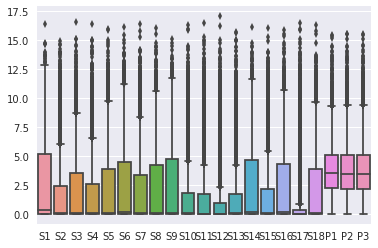

In [50]:
sns.boxplot(expression_filtered_by_all_samples)

# gcf = Get current figure
fig = plt.gcf()
fig.savefig('expression_filtered_by_all_samples_boxplot.pdf')

### Discussion

1. How did the gene expression distributions change? Why?
2. Were the single and pooled samples' distributions affected differently? Why or why not?

## Getting only the columns you want

In the next exercise, we'll get just the single cells

For the next step, we're going to pull out just the pooled - which are conveniently labeled as "P#". We'll do this using a [list comprehension](http://www.pythonforbeginners.com/basics/list-comprehensions-in-python), which means we'll create a new list based on the items in `shalek2013_expression.columns` and whether or not they start with the letter `'P'`.

In Python, things in square brackets (`[]`) are lists unless indicated otherwise. We are using a list comprehension here instead of a map, because we only want a *subset* of the columns, rather than *all* of them.

In [51]:
pooled_ids = [x for x in expression_logged.columns if x.startswith('P')]
pooled_ids

['P1', 'P2', 'P3']

We'll access the columns we want using this bracket notation (note that this only works for columns, not rows)

In [52]:
pooled = expression_logged[pooled_ids]
pooled.head()

,P1,P2,P3
GENE,,,
XKR4,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000
B3GAT2,0.748742,0.032801,0.150866
NPL,3.019587,2.949914,3.956563
T2,0.086869,0.000000,0.071221


We could do the same thing using `.loc` but we would need to put a colon "`:`" in the "rows" section (first place) to show that we want "all rows."

In [53]:
expression_logged.loc[:, pooled_ids].head()

,P1,P2,P3
GENE,,,
XKR4,0.000000,0.028436,0.000000
AB338584,0.000000,0.000000,0.000000
B3GAT2,0.748742,0.032801,0.150866
NPL,3.019587,2.949914,3.956563
T2,0.086869,0.000000,0.071221


### Exercise 7: Make a dataframe of only single samples

Use list comprehensions to make a list called `single_ids` that consists only of single cells, and use that list to subset `expression_logged` and create a dataframe called `singles`. (Hint - how are the single cells ids different from the pooled ids?)

In [ ]:
# YOUR CODE HERE

print(singles.shape)
singles.head()

![](figures/dont_scroll.svg)

In [56]:
single_ids = [x for x in expression_logged.columns if x.startswith('S')]
singles = expression_logged[single_ids]
print(singles.shape)
singles.head()

(27723, 18)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
GENE,,,,,,,,,,,,,,,,,,
XKR4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AB338584,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B3GAT2,0.000000,0.000000,0.033427,0.000000,0.000000,0.041774,0.000000,0.077861,0.000000,0.041871,0.034409,0.000000,0.000000,0.044960,0.000000,0.000000,0.000000,5.431296
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,0.000000,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000
T2,0.149583,0.228984,0.000000,0.000000,0.242088,0.105695,0.109290,0.000000,0.129215,0.106459,0.000000,0.759973,0.014551,0.113616,0.000000,0.000000,0.120192,0.095146


## Using two different dataframes for filtering

### Exercise 8: Filter the full dataframe using the singles dataframe

Now we'll actually do the filtering done by the paper. Using the `singles` dataframe you just created, get the genes that have expression greater than 1 in at least 3 single cells, and use that to filter `expression_logged`. Call this dataframe `expression_filtered_by_singles`.

In [ ]:
# YOUR CODE HERE

print(expression_filtered_by_singles.shape)
expression_filtered_by_singles.head()

![](figures/dont_scroll.svg)

In [57]:
rows = (singles > 1).sum(axis=1) > 3

expression_filtered_by_singles = expression_logged.loc[rows]
print(expression_filtered_by_singles.shape)
expression_filtered_by_singles.head()

(5346, 21)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,P1,P2,P3
GENE,,,,,,,,,,,,,,,,,,,,,
NPL,6.189994,0.000000,7.011921,0.131039,0.000000,0.000000,6.824134,6.718761,0.162507,0.000000,0.000000,0.000000,0.159374,0.143002,0.145597,0.297716,0.151316,0.000000,3.019587,2.949914,3.956563
QK,7.268986,6.035328,5.551280,0.096368,4.769427,0.164792,5.381642,3.967559,0.193883,1.096957,0.952657,0.000000,4.899227,3.310201,0.434425,5.118232,3.153489,0.059040,5.581934,5.324961,5.297343
AK163153,1.802450,2.809825,1.561663,1.615288,1.828564,1.301057,1.490883,1.411808,1.761127,1.493531,1.156065,3.509926,3.034182,1.602128,1.734510,6.415105,1.972540,0.617935,0.872966,0.566249,0.411154
PARK2,0.780057,0.721962,0.871528,0.604061,0.000000,0.867463,0.584193,0.797628,0.495236,1.217808,0.691142,2.325056,1.089339,1.600526,1.165026,0.846808,0.699883,0.131962,1.176145,0.385246,0.931065
AGPAT4,0.137159,8.466538,5.968792,0.095240,0.000000,6.852955,0.100044,5.959222,4.802383,0.000000,7.381994,0.000000,0.000000,6.392022,0.000000,0.000000,6.086903,0.246741,4.117659,3.086869,4.048623


Let's make a boxplot again to see how the data has changed.

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)
/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


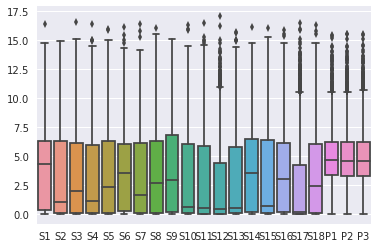

In [58]:
sns.boxplot(expression_filtered_by_singles)

fig = plt.gcf()
fig.savefig('expression_filtered_by_singles_boxplot.pdf')

This is much nicer because now we don't have so many zeros and each sample has a reasonable dynamic range.

## Why did this filtering even matter?

You may be wondering, we did all this work to remove some zeros..... so the FPKM what? Let's take a look at how this affects the relationships between samples using `sns.jointplot` from seaborn, which will plot a correlation scatterplot. This also calculates the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), a linear correlation metric.

Let's first do this on the unlogged data.

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


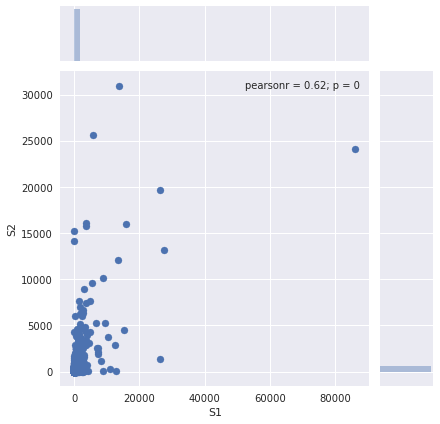

In [59]:
sns.jointplot(shalek2013_expression['S1'], shalek2013_expression['S2'])

Pretty funky looking huh? That's why we logged it :)

Now let's try this on the logged data.

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


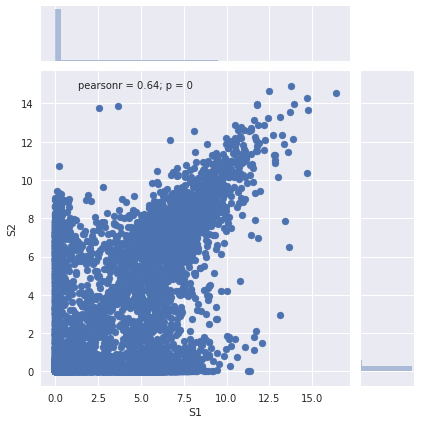

In [60]:
sns.jointplot(expression_logged['S1'], expression_logged['S2'])

Hmm our pearson correlation increased from 0.62 to 0.64. Why could that be?

Let's look at this same plot using the filtered data.

/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


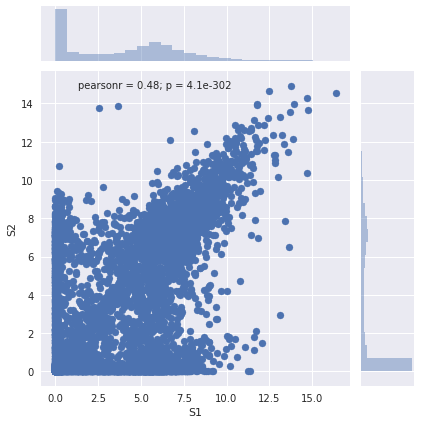

In [61]:
sns.jointplot(expression_filtered_by_singles['S1'], expression_filtered_by_singles['S2'])

And now our correlation went DOWN!? Why would that be? 

### Exercise 9: Discuss changes in correlation

Take 2-5 sentences to explain why the correlation changed between the different datasets.

YOUR ANSWER HERE